<a href="https://colab.research.google.com/github/ph-spec/Credit-card-default-prediction/blob/main/Optimisation%20of%20gradient%20boost%20neural%20network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
import sqlite3
import sqlite3
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import os

In [2]:
import scipy

In [3]:
from scipy import stats

In [4]:
from scipy.stats import pearsonr

In [5]:
from scipy.stats import ttest_ind

In [6]:
from sklearn.metrics import classification_report

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder

In [9]:
import requests

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
# machine learning algorithm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
import math
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


In [15]:
# evaluation on test data
from sklearn.metrics import classification_report,confusion_matrix

In [16]:
pip install xlrd

UPLOAD DATASET

In [17]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
file_path = '/content/drive/My Drive/clean_creditt.csv'

In [19]:
creditt = pd.read_csv(file_path)

In [20]:
X = creditt.drop(columns=['DEFAULT_PAYMENT'])
y =creditt['DEFAULT_PAYMENT']

In [21]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=48000, n_features=19, n_informative=2, n_redundant=10,
                           n_clusters_per_class=1, weights=[0.8, 0.2], flip_y=0, random_state=42)


In [22]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

OPTIMISATION FOR NEURAL NETWORK

In [24]:
pip install tensorflow scikit-learn numpy

In [25]:
pip install --upgrade tensorflow


In [26]:
pip install keras

In [27]:
!pip install -U scikit-learn

In [28]:
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier  # Correct import

In [29]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}


gbdt = XGBClassifier(random_state=42)

grid_search = GridSearchCV(estimator=gbdt, param_grid=param_grid, scoring='roc_auc', cv=3, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

gbdt_optimized = XGBClassifier(**best_params, random_state=42)
gbdt_optimized.fit(X_train, y_train)

X_train_leaves = gbdt_optimized.apply(X_train).reshape(X_train.shape[0], -1)
X_test_leaves = gbdt_optimized.apply(X_test).reshape(X_test.shape[0], -1)

scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train_leaves)
X_test_transformed = scaler.transform(X_test_leaves)



Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


In [30]:
model = Sequential([
    Dense(64, activation="relu", input_dim=X_train_transformed.shape[1]),
    Dropout(0.3),
    Dense(32, activation="relu"),
    Dense(1, activation="sigmoid")  # Binary classification
])
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.fit(X_train_transformed, y_train, epochs=10, batch_size=16, validation_split=0.2, verbose=0)


300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy: 0.9899
Precision: 0.9903
Recall: 0.9586
F1 Score: 0.9742
ROC AUC Score: 0.9993


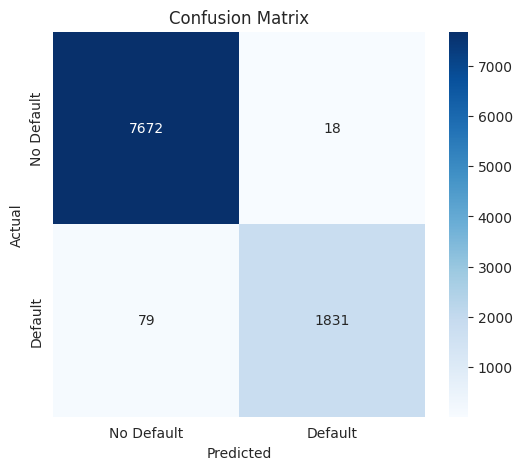

In [32]:
grid_result = y_pred_proba = model.predict(X_test_transformed).flatten()
y_pred = (y_pred_proba >= 0.5).astype(int)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["No Default", "Default"], yticklabels=["No Default", "Default"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()